In [1]:
#Importing all modules required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.utils import resample
import time, os, shutil
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# # Do this to import dataframe containing training point

banten = pd.read_csv('Retraining_banten_index.csv', index_col = 0) 
sumbar = pd.read_csv('Retraining_sumbar_index.csv', index_col = 0)
kalteng = pd.read_csv('Retraining_kalteng_index.csv', index_col = 0)
medan = pd.read_csv('Retraining_medan_index.csv', index_col = 0)

# Appending all datasets into one dataframe. Do this if you get new training data and in separated files
new_training = banten.append(sumbar).append(kalteng).append(medan)

In [3]:
new_training.head()

,Label,Id_class,MBI,MNDWI,NDVI,SAVI,Id_Class
Id,,,,,,,
0,Vegetation,3.0,0.059762,-0.319626,0.603303,0.948593,NaN
0,Vegetation,3.0,0.102904,-0.358828,0.633381,0.987429,NaN
0,Vegetation,3.0,0.065443,-0.280920,0.595352,0.925256,NaN
0,Vegetation,3.0,0.029689,-0.268155,0.614327,0.947649,NaN
0,Vegetation,3.0,0.058314,-0.317022,0.575451,0.921374,NaN


In [4]:
# Checking number of row and column
new_training.shape

(26829, 7)

In [5]:
# Selecting required column
new_training = new_training[["Label", "MBI", "MNDWI", "NDVI", "SAVI"]]

In [8]:
new_training.head()

,Label,MBI,MNDWI,NDVI,SAVI
Id,,,,,
0,Vegetation,0.059762,-0.319626,0.603303,0.948593
0,Vegetation,0.102904,-0.358828,0.633381,0.987429
0,Vegetation,0.065443,-0.280920,0.595352,0.925256
0,Vegetation,0.029689,-0.268155,0.614327,0.947649
0,Vegetation,0.058314,-0.317022,0.575451,0.921374


In [9]:
new_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26829 entries, 0 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   26829 non-null  object 
 1   MBI     26829 non-null  float64
 2   MNDWI   26829 non-null  float64
 3   NDVI    26829 non-null  float64
 4   SAVI    26829 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


In [10]:
new_training.Label.value_counts()

Vegetation    5985
Bareland      5891
WaterBody     5543
Cloud         5013
BuiltUp       4397
Name: Label, dtype: int64

### Encoding

In [11]:
#Encoding old character label into numerical value. Bareland and BuiltUp is merged into one. 
#This is optional but depending on the business needs
new_training.Label[new_training.Label=="Bareland"] = 1
new_training.Label[new_training.Label=="BuiltUp"] = 1
new_training.Label[new_training.Label=="Vegetation"] = 2
new_training.Label[new_training.Label=="WaterBody"] = 3
new_training.Label[new_training.Label=="Cloud"] = 4

C:\Program Files\ArcGIS\Server\framework\runtime\ArcGIS\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Program Files\ArcGIS\Server\framework\runtime\ArcGIS\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Program Files\ArcGIS\Server\framework\runtime\ArcGIS\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [12]:
# Checking dataframe after encoding
new_training.head()

,Label,MBI,MNDWI,NDVI,SAVI
Id,,,,,
0,2,0.059762,-0.319626,0.603303,0.948593
0,2,0.102904,-0.358828,0.633381,0.987429
0,2,0.065443,-0.280920,0.595352,0.925256
0,2,0.029689,-0.268155,0.614327,0.947649
0,2,0.058314,-0.317022,0.575451,0.921374


In [13]:
new_training.Label.value_counts()

1    10288
2     5985
3     5543
4     5013
Name: Label, dtype: int64

### Drop Null Value

In [14]:
# Checking null value
new_training.isnull().sum()

Label    0
MBI      0
MNDWI    0
NDVI     0
SAVI     0
dtype: int64

In [15]:
new_training.dropna(inplace=True)

In [16]:
new_training.Label.value_counts()

1    10288
2     5985
3     5543
4     5013
Name: Label, dtype: int64

In [17]:
new_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26829 entries, 0 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   26829 non-null  object 
 1   MBI     26829 non-null  float64
 2   MNDWI   26829 non-null  float64
 3   NDVI    26829 non-null  float64
 4   SAVI    26829 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


In [18]:
new_training.head()

,Label,MBI,MNDWI,NDVI,SAVI
Id,,,,,
0,2,0.059762,-0.319626,0.603303,0.948593
0,2,0.102904,-0.358828,0.633381,0.987429
0,2,0.065443,-0.280920,0.595352,0.925256
0,2,0.029689,-0.268155,0.614327,0.947649
0,2,0.058314,-0.317022,0.575451,0.921374


### Dataset Splitting

In [19]:
# Splitting dataset into label (y) and features (x) 
X = new_training[['MBI', 'MNDWI', 'NDVI', 'SAVI']]
y = new_training.Label.astype(int)

In [20]:
print(X, y)

         MBI     MNDWI      NDVI      SAVI
Id                                        
0   0.059762 -0.319626  0.603303  0.948593
0   0.102904 -0.358828  0.633381  0.987429
0   0.065443 -0.280920  0.595352  0.925256
0   0.029689 -0.268155  0.614327  0.947649
0   0.058314 -0.317022  0.575451  0.921374
..       ...       ...       ...       ...
0   0.148677  0.209692 -0.048712 -0.073066
0   0.143679  0.230219 -0.063337 -0.095003
0   0.119895  0.238369 -0.043671 -0.065505
0   0.083175  0.324314 -0.045745 -0.068615
0   0.083686  0.306134 -0.036268 -0.054401

[26829 rows x 4 columns] Id
0    2
0    2
0    2
0    2
0    2
    ..
0    4
0    4
0    4
0    4
0    4
Name: Label, Length: 26829, dtype: int32


In [21]:
y.value_counts()

1    10288
2     5985
3     5543
4     5013
Name: Label, dtype: int64

In [22]:
# Check if the length of data in X and y is same. If yes, there is nothing wrong with the datasets
len(y) == len(X)

True

In [23]:
# In this step we will make data test and data training. Our machine learning model will use data training to learn the data. 
# Data test will be used for validate the performance of the model
# We will split all data into 25% data test and 75% data training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20121, 4), (6708, 4), (20121,), (6708,))

###  Model Training

In [24]:
num_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe, X_train.columns)
])

In [26]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='multinomial', solver='sag', n_jobs=-1, random_state=42))
])

In [27]:
logreg_param = {
    'algo__fit_intercept' : [True],
    'algo__C' : np.array([1e2])
}

In [28]:
model_logreg = LogisticRegression(multi_class='multinomial', solver='sag', n_jobs=-1, random_state=42)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MBI     20121 non-null  float64
 1   MNDWI   20121 non-null  float64
 2   NDVI    20121 non-null  float64
 3   SAVI    20121 non-null  float64
dtypes: float64(4)
memory usage: 786.0 KB


In [30]:
# Implement logistic regression model

model = GridSearchCV(pipeline, logreg_param, cv=5, n_jobs=-1, verbose=1)
model_logreg.fit(X_train, y_train)

#print(model_logreg.best_params_)
print(model_logreg.score(X_train, y_train), model_logreg.score(X_test,y_test))

0.9162566472839322 0.9193500298151461


### Evaluation
#### Evaluate the result of data training into data test

In [31]:
y_pred = model_logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93      2572
           2       0.97      0.98      0.98      1497
           3       0.95      0.91      0.93      1386
           4       0.79      0.86      0.82      1253

    accuracy                           0.92      6708
   macro avg       0.91      0.92      0.91      6708
weighted avg       0.92      0.92      0.92      6708



C:\Users\mjanuadi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix (Normalized)')

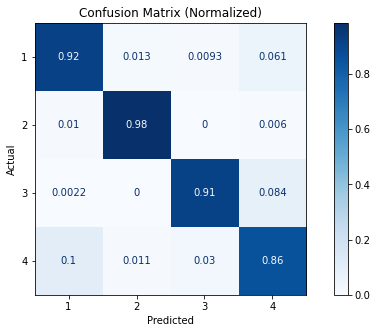

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(model_logreg,X_test,y_test,cmap=plt.cm.Blues,normalize='true',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix (Normalized)')

### Save Model

In [35]:
#saving to new dataframe (optional)
new_training.to_csv('new_trainingUAT2.csv', index=False)

In [36]:
# Saving model for inferencing
with open('model_logreg_UAT2.sav', 'wb') as f:
    pickle.dump(model_logreg, f)

In [70]:
model_logreg

LogisticRegression(multi_class='multinomial', n_jobs=-1, random_state=42,
                   solver='sag')